In [89]:
import sqlite3
import pandas as pd
from framework.draw import *
from framework.data import sql
from sklearn import *
from scipy.stats import *

In [61]:
data = pd.read_sql('''
select `Provider Number`, `Graduation year`, `Total Performance Score`
from hospital_practitioners
''', sql)

old = data[data['Graduation year'] < 1980]
young = data[data['Graduation year'] > 1980]
print(data.shape, old.shape, young.shape)

(3284987, 4) (484391, 4) (2738151, 4)


/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.6221878528594971, 0.0)

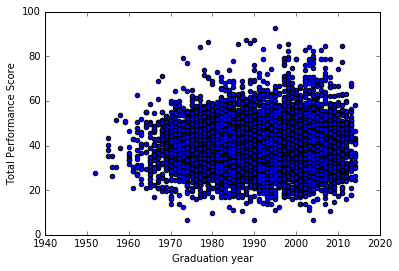

In [3]:
data.sample(10000).plot(kind='scatter', x='Graduation year', y='Total Performance Score')
shapiro([data['Total Performance Score'], data['Graduation year']])

/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.6453970670700073, 0.0)

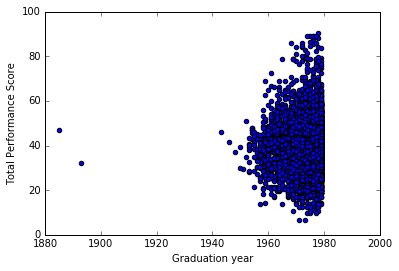

In [4]:
old.sample(10000).plot(kind='scatter', x='Graduation year', y='Total Performance Score')
shapiro([old['Graduation year'], old['Total Performance Score']])

/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.6192514896392822, 0.0)

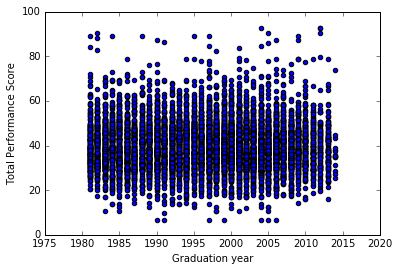

In [5]:
young.sample(10000).plot(kind='scatter', x='Graduation year', y='Total Performance Score')
shapiro([young['Graduation year'], young['Total Performance Score']])

/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9843584299087524, 0.0)

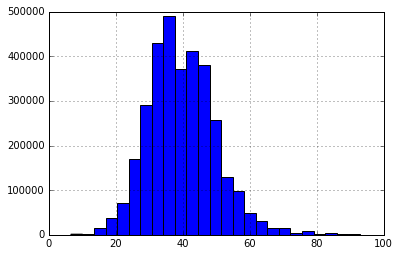

In [7]:
data['Total Performance Score'].hist(bins=25)
shapiro(data['Total Performance Score'])

/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.02715831995010376, 0.0)

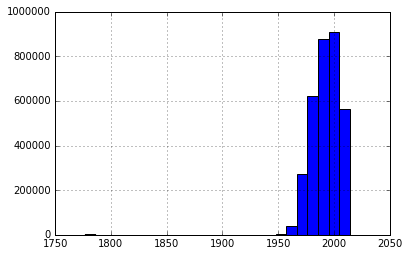

In [8]:
data['Graduation year'].hist(bins=25)
shapiro(data['Graduation year'])

/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9798344969749451, 0.0)

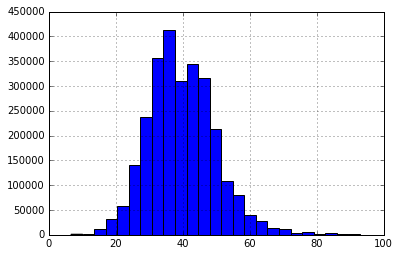

In [9]:
young['Total Performance Score'].hist(bins=25)
shapiro(young['Total Performance Score'])

/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.0181695818901062, 0.0)

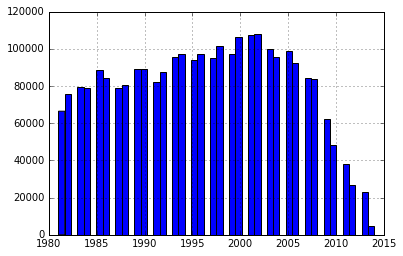

In [10]:
young['Graduation year'].hist(bins=50)
shapiro(young['Graduation year'])

/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9845665097236633, 0.0)

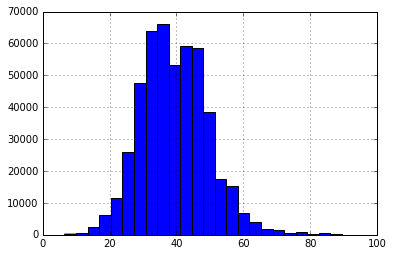

In [11]:
old['Total Performance Score'].hist(bins=25)
shapiro(old['Total Performance Score'])

/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8308651447296143, 0.0)

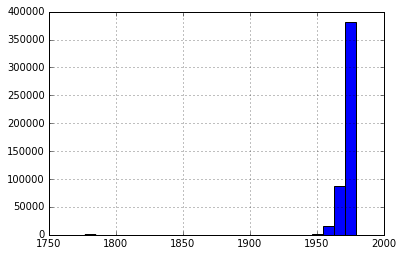

In [12]:
old['Graduation year'].hist(bins=25)
shapiro(old['Graduation year'])

In [58]:
spearmanr(data['Graduation year'], data['Total Performance Score'])

SpearmanrResult(correlation=0.0081128368323717635, pvalue=6.0426840330448403e-49)

In [38]:
scaler = preprocessing.StandardScaler()
data['Graduation year'] = scaler.fit_transform(data['Graduation year'], data['Total Performance Score'])
young = pd.DataFrame(data.ix[young.index])
old = pd.DataFrame(data.ix[old.index])

/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9717593789100647, 0.0)

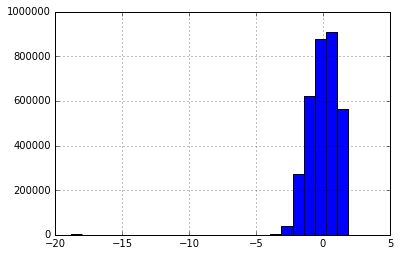

In [25]:
data['Graduation year'].hist(bins=25)
shapiro(data['Graduation year'])

/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9712017178535461, 0.0)

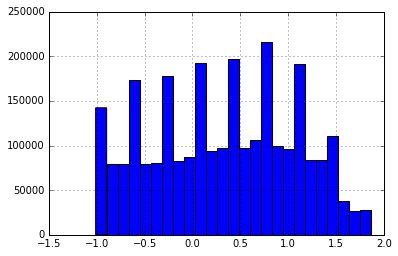

In [39]:
young['Graduation year'].hist(bins=25)
shapiro(young['Graduation year'])

/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8523671627044678, 0.0)

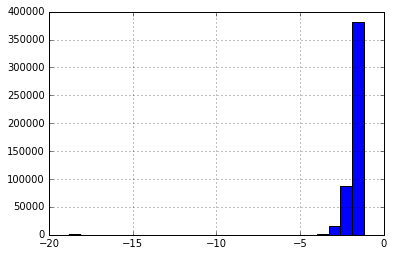

In [40]:
old['Graduation year'].hist(bins=25)
shapiro(old['Graduation year'])

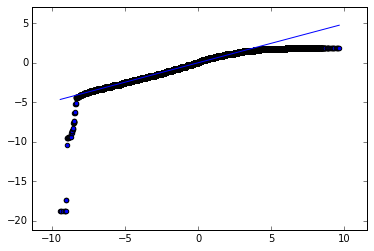

In [54]:
norm_data = np.random.normal(0,2,len(data['Graduation year']))
norm_data.sort()
draw(kind='linear_regression', x=norm_data, y=data['Graduation year'].sort_values(), c='#0000ff')

In [57]:
spearmanr(data['Graduation year'], data['Total Performance Score'])

SpearmanrResult(correlation=0.0081128368323717635, pvalue=6.0426840330448403e-49)

In [145]:
data = pd.read_sql('''
select `Provider Number`, `Primary specialty`, `Graduation year`, `Total Performance Score`
from hospital_practitioners
''', sqlite3.connect('/tmp/data.sqlite3'))
# where `State`="NY"
print(data.shape)

(170985, 4)


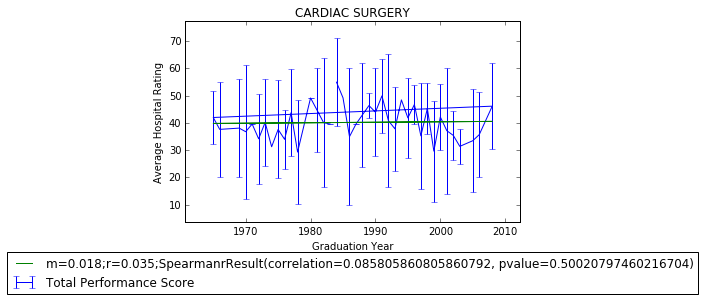

In [148]:
stats = pd.DataFrame()
for specialty, ind in data.groupby('Primary specialty').groups.items():
    g = data.ix[ind, :].groupby('Graduation year')
    year = np.array(list(g.groups.keys()))
    years = year[:, np.newaxis]
    std_score = g['Total Performance Score'].std()
    mean_score = g['Total Performance Score'].mean()
    
    lr = linear_model.LinearRegression()
    lr.fit(years, mean_score)

    r2 = lr.score(years, mean_score)
    r = r2**(1/2)
    m = lr.coef_[0]
    spearman_val = spearmanr(years, mean_score)
    
    stats = stats.append({
            'specialty': specialty,
            'std': mean_score.std(),
            'mean': mean_score.mean(),
            'r': r,
            'm': m,
            'spearman': spearman_val,
        }, ignore_index=True)
    
    if specialty == 'CARDIAC SURGERY':
        draw(kind='errorbar', x=years, y=mean_score, yerr=2*std_score, title=specialty, xlabel='Graduation Year', ylabel='Average Hospital Rating')
        draw(kind='plot', x=years, y=lr.predict(years), label='m=%0.3f;r=%0.3f;%s' % (m, r, str(spearman)), xlabel='Graduation Year', ylabel='Average Hospital Rating', legend='bottom', show=True)

In [149]:
stats = stats.dropna()
stats[stats['r']>0.4].sort_values('r', ascending=False)

,m,mean,r,spearman,specialty,std
17,-5.352525,43.862121,1.000000,"(-1.0, nan)",OCCUPATIONAL THERAPY,11.354421
38,0.420508,29.385522,1.000000,"(1.0, nan)",SLEEP LABORATORY/MEDICINE,3.270786
46,-2.065014,36.324242,1.000000,"(-1.0, nan)",CLINICAL NURSE SPECIALIST,16.062038
63,-3.122559,40.615152,1.000000,"(-1.0, nan)",ANESTHESIOLOGY ASSISTANT,19.871843
60,0.427574,36.632407,0.896804,"(0.714285714286, 0.110787172012)",ADDICTION MEDICINE,7.715815
8,-0.077143,49.640909,0.755929,"(-0.866025403784, 0.333333333333)",PREVENTATIVE MEDICINE,0.779423
10,0.106457,38.175296,0.485229,"(0.44371875504, 0.000874935353689)",UROLOGY,3.421452
69,0.099890,37.984707,0.479760,"(0.50426035867, 5.44041235813e-05)",GENERAL SURGERY,3.634146
43,0.123733,38.856913,0.462780,"(0.453998632946, 0.000440648240015)",PATHOLOGY,4.549447
34,0.187394,38.323032,0.426646,"(0.419572828336, 0.00299176663115)",RADIATION ONCOLOGY,6.338606


In [144]:
stats.to_csv('results_new.csv')

In [97]:
from scipy.stats import probplot

/usr/lib/python3.5/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.02715831995010376, 0.0)

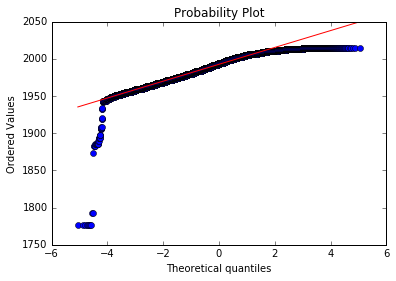

In [102]:
probplot(data['Graduation year'], dist='norm', plot=plt)
shapiro(data['Graduation year'])

/home/u8sand/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/u8sand/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/u8sand/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/u8sand/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19

(0.9717593789100647, 0.0)

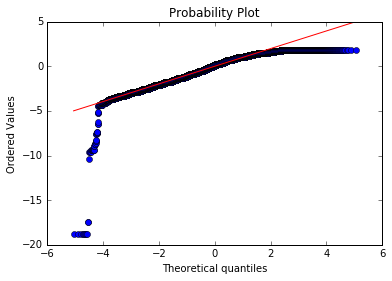

In [103]:
probplot(scaler.fit_transform(data['Graduation year'], data['Total Performance Score']), dist='norm', plot=plt)
shapiro(scaler.fit_transform(data['Graduation year'], data['Total Performance Score']))